In [31]:
import pandas as pd

In [32]:
dataIn = './../dataIn/'
dataOut = './../dataOut/'
myencoding = 'CP949'

In [33]:
filename01 = dataIn + '가전제품판매량01.csv'
homeware01 = pd.read_csv(filename01, encoding=myencoding, index_col='지역')
homeware01

,미니오븐,전기밥솥,후라이팬,분기
지역,,,,
서울,65,85,70,1
대전,90,85,65,1
대구,60,90,50,1


In [34]:
filename02 = dataIn + '가전제품판매량02.csv'
homeware02 = pd.read_csv(filename02, encoding=myencoding, index_col='지역')
homeware02

,미니오븐,전기밥솥,세탁기,분기
지역,,,,
서울,55,35,100,2
대전,90,85,70,2
부산,60,90,40,2


In [35]:
columnInfo01 = homeware01.columns # 상반기 컬럼정보
columnInfo02 = homeware02.columns

In [36]:
print('양쪽에 공통적으로 들어있는 제품')
columnInfo01.intersection(columnInfo02)

양쪽에 공통적으로 들어있는 제품


Index(['미니오븐', '전기밥솥', '분기'], dtype='object')

In [37]:
print('상반기에만 판매된 제품')
print(columnInfo01.difference(columnInfo02))

print('\n하반기에만 판매된 제품')
print(columnInfo02.intersection(columnInfo01))

상반기에만 판매된 제품
Index(['후라이팬'], dtype='object')

하반기에만 판매된 제품
Index(['미니오븐', '전기밥솥', '분기'], dtype='object')


In [38]:
print('분기별 판매량 결합')
result = pd.concat([homeware01, homeware02], join='inner')
result

분기별 판매량 결합


,미니오븐,전기밥솥,분기
지역,,,
서울,65,85,1
대전,90,85,1
대구,60,90,1
서울,55,35,2
대전,90,85,2
부산,60,90,2


In [39]:
print('양쪽에 공통적이지 않은 항목은 NaN 데이터가 됩니다.')
result = pd.concat([homeware01, homeware02], axis=0) # outer join
result

양쪽에 공통적이지 않은 항목은 NaN 데이터가 됩니다.


,미니오븐,전기밥솥,후라이팬,분기,세탁기
지역,,,,,
서울,65,85,70.0,1,NaN
대전,90,85,65.0,1,NaN
대구,60,90,50.0,1,NaN
서울,55,35,NaN,2,100.0
대전,90,85,NaN,2,70.0
부산,60,90,NaN,2,40.0


In [40]:
print('열방향으로 합치기')
result = pd.concat([homeware01, homeware02], axis=1) # outer join
result

열방향으로 합치기


,미니오븐,전기밥솥,후라이팬,분기,미니오븐,전기밥솥,세탁기,분기
지역,,,,,,,,
서울,65.0,85.0,70.0,1.0,55.0,35.0,100.0,2.0
대전,90.0,85.0,65.0,1.0,90.0,85.0,70.0,2.0
대구,60.0,90.0,50.0,1.0,NaN,NaN,NaN,NaN
부산,NaN,NaN,NaN,NaN,60.0,90.0,40.0,2.0


In [41]:
file01 = dataIn + '학생정보01.csv'
student = pd.read_csv(file01, encoding=myencoding)
student

,id,이름,주소
0,kang,강유심,마포
1,shin,신서윤,용산
2,choi,최윤라,강남


In [42]:
file02 = dataIn + '시험점수01.csv'
jumsu = pd.read_csv(file02, encoding=myencoding)
jumsu

,id,과목,점수
0,kang,국어,10
1,kang,영어,15
2,kang,수학,20
3,shin,국어,25
4,shin,영어,30
5,shin,수학,30


In [43]:
print('양쪽 프레임에 공통된 컬럼 정보')
col_student = student.columns
col_jumsu = jumsu.columns
col_student.intersection(col_jumsu)

양쪽 프레임에 공통된 컬럼 정보


Index(['id'], dtype='object')

In [45]:
result = pd.merge(student, jumsu, on='id')
result

,id,이름,주소,과목,점수
0,kang,강유심,마포,국어,10
1,kang,강유심,마포,영어,15
2,kang,강유심,마포,수학,20
3,shin,신서윤,용산,국어,25
4,shin,신서윤,용산,영어,30
5,shin,신서윤,용산,수학,30


In [50]:
# 아이디가 'kang'인 학생 정보 추출
chartdata03 = result.copy()
chartdata03 = chartdata03.loc[chartdata03['id'] == 'kang',['과목','점수']]
chartdata03 = chartdata03.set_index('과목')
chartdata03

,점수
과목,
국어,10
영어,15
수학,20


In [47]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

Text(0.5, 1.0, '과목별 점수 비율')

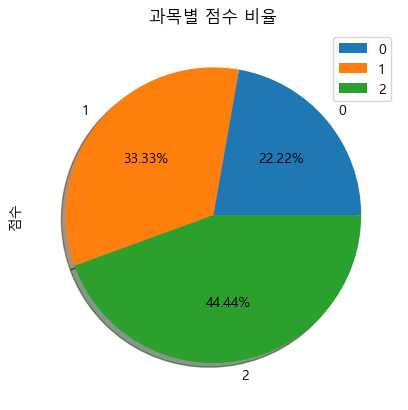

In [49]:
mylabel = chartdata03.index
chartdata03.plot(kind='pie', shadow=True, y='점수', autopct='%1.2f%%', labels = mylabel)
plt.xlabel(chartdata03.index.name)
plt.title(f'과목별 점수 비율')

In [51]:
result = pd.merge(student, jumsu, on='id', how='outer')
result

,id,이름,주소,과목,점수
0,choi,최윤라,강남,NaN,NaN
1,kang,강유심,마포,국어,10.0
2,kang,강유심,마포,영어,15.0
3,kang,강유심,마포,수학,20.0
4,shin,신서윤,용산,국어,25.0
5,shin,신서윤,용산,영어,30.0
6,shin,신서윤,용산,수학,30.0


In [52]:
result = pd.merge(student, jumsu, on='id', how='left')
result

,id,이름,주소,과목,점수
0,kang,강유심,마포,국어,10.0
1,kang,강유심,마포,영어,15.0
2,kang,강유심,마포,수학,20.0
3,shin,신서윤,용산,국어,25.0
4,shin,신서윤,용산,영어,30.0
5,shin,신서윤,용산,수학,30.0
6,choi,최윤라,강남,NaN,NaN


In [53]:
result = pd.merge(student, jumsu, on='id', how='right')
result

,id,이름,주소,과목,점수
0,kang,강유심,마포,국어,10
1,kang,강유심,마포,영어,15
2,kang,강유심,마포,수학,20
3,shin,신서윤,용산,국어,25
4,shin,신서윤,용산,영어,30
5,shin,신서윤,용산,수학,30


In [54]:
file01 = dataIn + '학생정보02.csv'
student = pd.read_csv(file01, encoding=myencoding)
student

,leftid,이름,주소
0,kang,강유심,마포
1,shin,신서윤,용산
2,choi,최윤라,강남


In [55]:
file02 = dataIn + '시험점수02.csv'
jumsu = pd.read_csv(file02, encoding=myencoding)
jumsu

,rightid,과목,점수
0,kang,국어,10
1,kang,영어,15
2,kang,수학,20
3,shin,국어,25
4,shin,영어,30
5,shin,수학,30


In [57]:
result = pd.merge(student,jumsu, left_on='leftid', right_on='rightid')
result

,leftid,이름,주소,rightid,과목,점수
0,kang,강유심,마포,kang,국어,10
1,kang,강유심,마포,kang,영어,15
2,kang,강유심,마포,kang,수학,20
3,shin,신서윤,용산,shin,국어,25
4,shin,신서윤,용산,shin,영어,30
5,shin,신서윤,용산,shin,수학,30


In [64]:
file01 = dataIn + '시험점수03.csv'
data01 = pd.read_csv(file01, encoding=myencoding)
data01

,이름,과목,중간고사
0,강호섭,국어,10
1,강호섭,영어,15
2,강호섭,수학,20
3,윤진혁,국어,25
4,윤진혁,영어,30
5,윤진혁,수학,30


In [66]:
file02 = dataIn + '시험점수04.csv'
data02 = pd.read_csv(file02, encoding=myencoding)
data02

,이름,과목,기말고사
0,강호섭,국어,15
1,강호섭,영어,25
2,강호섭,수학,35
3,윤진혁,국어,45
4,윤진혁,영어,55


In [67]:
on_condition = ['이름','과목']
result = pd.merge(data01, data02, on=on_condition, how='outer')
result

,이름,과목,중간고사,기말고사
0,강호섭,국어,10,15.0
1,강호섭,수학,20,35.0
2,강호섭,영어,15,25.0
3,윤진혁,국어,25,45.0
4,윤진혁,수학,30,NaN
5,윤진혁,영어,30,55.0


In [68]:
file01 = dataIn + '시험점수05.csv'
data01 = pd.read_csv(file01, encoding=myencoding)
data01

,이름,과목,시험
0,강호섭,국어,10
1,강호섭,영어,15
2,강호섭,수학,20
3,윤진혁,국어,25
4,윤진혁,영어,30
5,윤진혁,수학,30


In [69]:
file02 = dataIn + '시험점수06.csv'
data02 = pd.read_csv(file02, encoding=myencoding)
data02

,이름,과목,시험
0,강호섭,국어,15
1,강호섭,영어,25
2,강호섭,수학,35
3,윤진혁,국어,45
4,윤진혁,영어,55


In [72]:
print('동일 이름의 컬럼이 있는 경우, 접미사로 구분함.')
on_condition = ['이름','과목']
result = pd.merge(data01, data02, on=on_condition, how='outer', suffixes=('__중간','__기말')) # 접미사 설정하고 싶으면 suffixes 옵션 사용
result

동일 이름의 컬럼이 있는 경우, 접미사로 구분함.


,이름,과목,시험__중간,시험__기말
0,강호섭,국어,10,15.0
1,강호섭,수학,20,35.0
2,강호섭,영어,15,25.0
3,윤진혁,국어,25,45.0
4,윤진혁,수학,30,NaN
5,윤진혁,영어,30,55.0


In [73]:
filename = dataIn + 'pivotFile.csv'
data = pd.read_csv(filename, encoding='UTF-8')
data

,name,item,value,qty
0,kim,apple,100,10
1,kim,orange,200,20
2,kim,peach,300,30
3,park,apple,100,40
4,park,orange,500,50
5,park,peach,600,60


In [76]:
pivotData = data.pivot(index='name',columns='item',values=['value','qty'])
pivotData

value                qty             
item apple orange peach apple orange peach
name                                      
kim    100    200   300    10     20    30
park   100    500   600    40     50    60

In [77]:
print('직원별 월별 실적')
filename = dataIn + 'meltsheet.csv'
siljuk = pd.read_csv(filename, encoding='CP949')
siljuk

직원별 월별 실적


,이름,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,강감찬,59,92,66,98,59,70,77,67,88,61,57,52
1,홍길동,90,96,56,92,95,54,80,62,64,65,90,73
2,이순신,65,70,74,60,57,76,61,53,79,95,61,75
3,김유신,93,67,90,82,98,61,80,95,83,80,88,86


In [78]:
chartdata = siljuk.copy()
chartdata = chartdata.set_index('이름').T
chartdata

이름,강감찬,홍길동,이순신,김유신
1월,59,90,65,93
2월,92,96,70,67
3월,66,56,74,90
4월,98,92,60,82
5월,59,95,57,98
6월,70,54,76,61
7월,77,80,61,80
8월,67,62,53,95
9월,88,64,79,83
10월,61,65,95,80


Text(0.5, 1.0, '직원별 월별 꺾은 선')

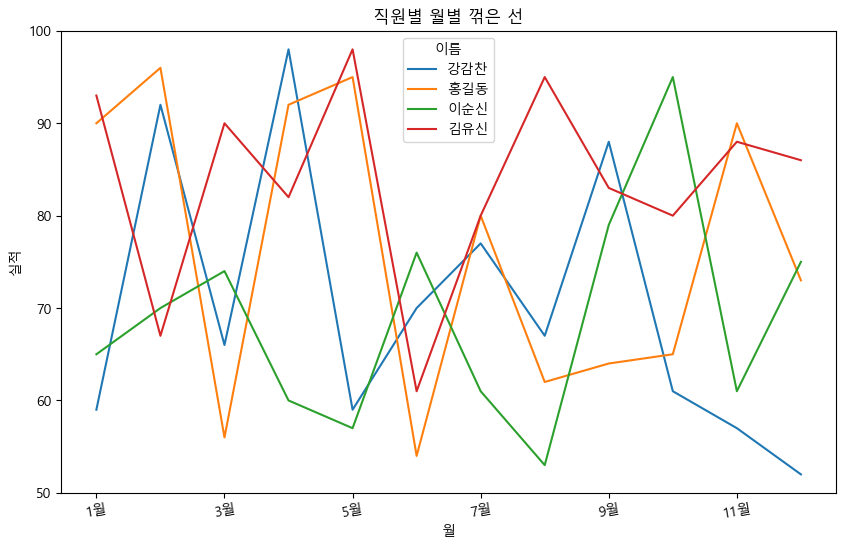

In [79]:
chartdata.plot(kind='line', figsize=(10,6),ylim=(50,100), rot=10)
plt.xlabel('월')
plt.ylabel('실적')
plt.title('직원별 월별 꺾은 선')

In [81]:
siljuk_long = pd.melt(siljuk,id_vars=['이름'], var_name='월', value_name='실적')
siljuk_long

,이름,월,실적
0,강감찬,1월,59
1,홍길동,1월,90
2,이순신,1월,65
3,김유신,1월,93
4,강감찬,2월,92
5,홍길동,2월,96
6,이순신,2월,70
7,김유신,2월,67
8,강감찬,3월,66
9,홍길동,3월,56


In [83]:
filename = dataIn + 'movie_show.csv'
movieshow = pd.read_csv(filename, encoding='CP949')
movieshow

,gu,year,month,드라마,공포,액션
0,마포구,2020,1,10,20,10
1,용산구,2020,1,20,20,30
2,마포구,2020,2,30,10,10
3,용산구,2020,2,30,30,20
4,마포구,2020,3,10,20,10
5,용산구,2020,3,20,20,30


In [85]:
movieshow_melt = pd.melt(movieshow, id_vars=['gu','year','month'], var_name='genre', value_name='qty')
movieshow_melt

,gu,year,month,genre,qty
0,마포구,2020,1,드라마,10
1,용산구,2020,1,드라마,20
2,마포구,2020,2,드라마,30
3,용산구,2020,2,드라마,30
4,마포구,2020,3,드라마,10
5,용산구,2020,3,드라마,20
6,마포구,2020,1,공포,20
7,용산구,2020,1,공포,20
8,마포구,2020,2,공포,10
9,용산구,2020,2,공포,30


In [87]:
# aggfunc 매개 변수(집계함수)의 기본 값은 평균(mean)
movieshow_pivot = movieshow_melt.pivot_table(index=['gu','year'], columns='month',values='qty', aggfunc='mean')
movieshow_pivot

,month,1,2,3
gu,year,,,
마포구,2020,13.333333,16.666667,13.333333
용산구,2020,23.333333,26.666667,23.333333


In [89]:
# 장르는 갯수, 수량은 평균 정보
dict_aggfunc = {'genre':'count','qty':'mean'}

movieshow_pivot = movieshow_melt.pivot_table(index=['gu','year'], columns='month',values=['genre','qty'], aggfunc=dict_aggfunc)
movieshow_pivot

genre              qty                      
month        1  2  3          1          2          3
gu  year                                             
마포구 2020     3  3  3  13.333333  16.666667  13.333333
용산구 2020     3  3  3  23.333333  26.666667  23.333333

In [93]:
# 장르는 갯수, 수량은 평균 정보
dict_aggfunc = {'qty':['mean','sum']}

movieshow_pivot = movieshow_melt.pivot_table(index=['gu','year'], columns='genre',values='qty', aggfunc=dict_aggfunc)
movieshow_pivot

mean                       sum        
genre            공포        드라마         액션  공포 드라마  액션
gu  year                                             
마포구 2020  16.666667  16.666667  10.000000  50  50  30
용산구 2020  23.333333  23.333333  26.666667  70  70  80

In [95]:
# 내부와 외부 색인을 합쳐서 간단하게 만들기
outer = movieshow_pivot.columns.get_level_values(0) # 외부 색인
inner = movieshow_pivot.columns.get_level_values(1) # 내부 색인

hangul_dict = {'mean':'평균','sum':'총합','max':'최대'}
newOuter = [hangul_dict[asdf] for asdf in outer]

newColumns = inner + '_' + newOuter
movieshow_pivot.columns = newColumns
movieshow_pivot

,genre,공포_평균,드라마_평균,액션_평균,공포_총합,드라마_총합,액션_총합
gu,year,,,,,,
마포구,2020,16.666667,16.666667,10.000000,50,50,30
용산구,2020,23.333333,23.333333,26.666667,70,70,80
